Loading Credit Card Fraud Dataset...
Dataset shape: (284807, 31)
Total transactions: 284,807
Fraud cases: 492
Fraud rate: 0.173%

DATASET INFO

Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

Data types:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Missing values: 0

STATISTICAL SUMMARY

Non-PC

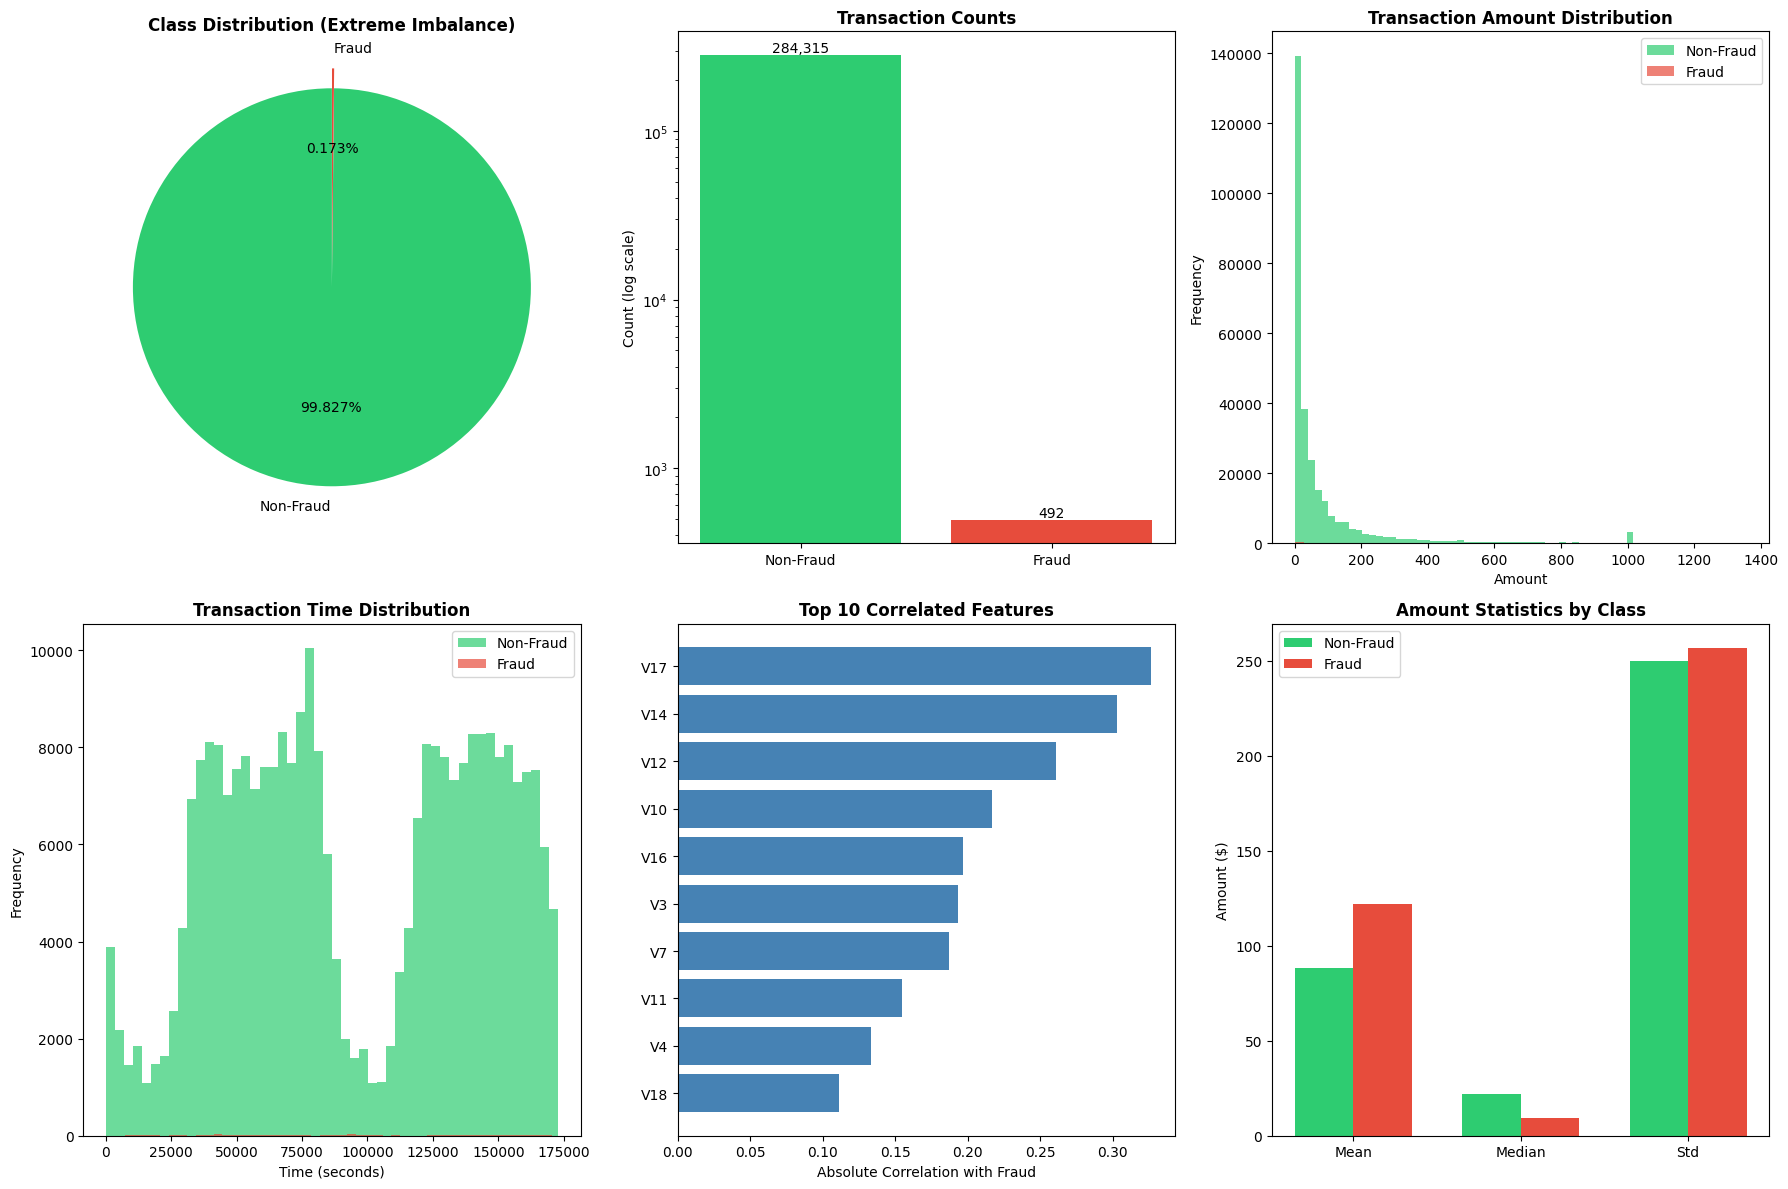


✓ EDA visualization saved: outputs/primary/eda/eda_overview.png


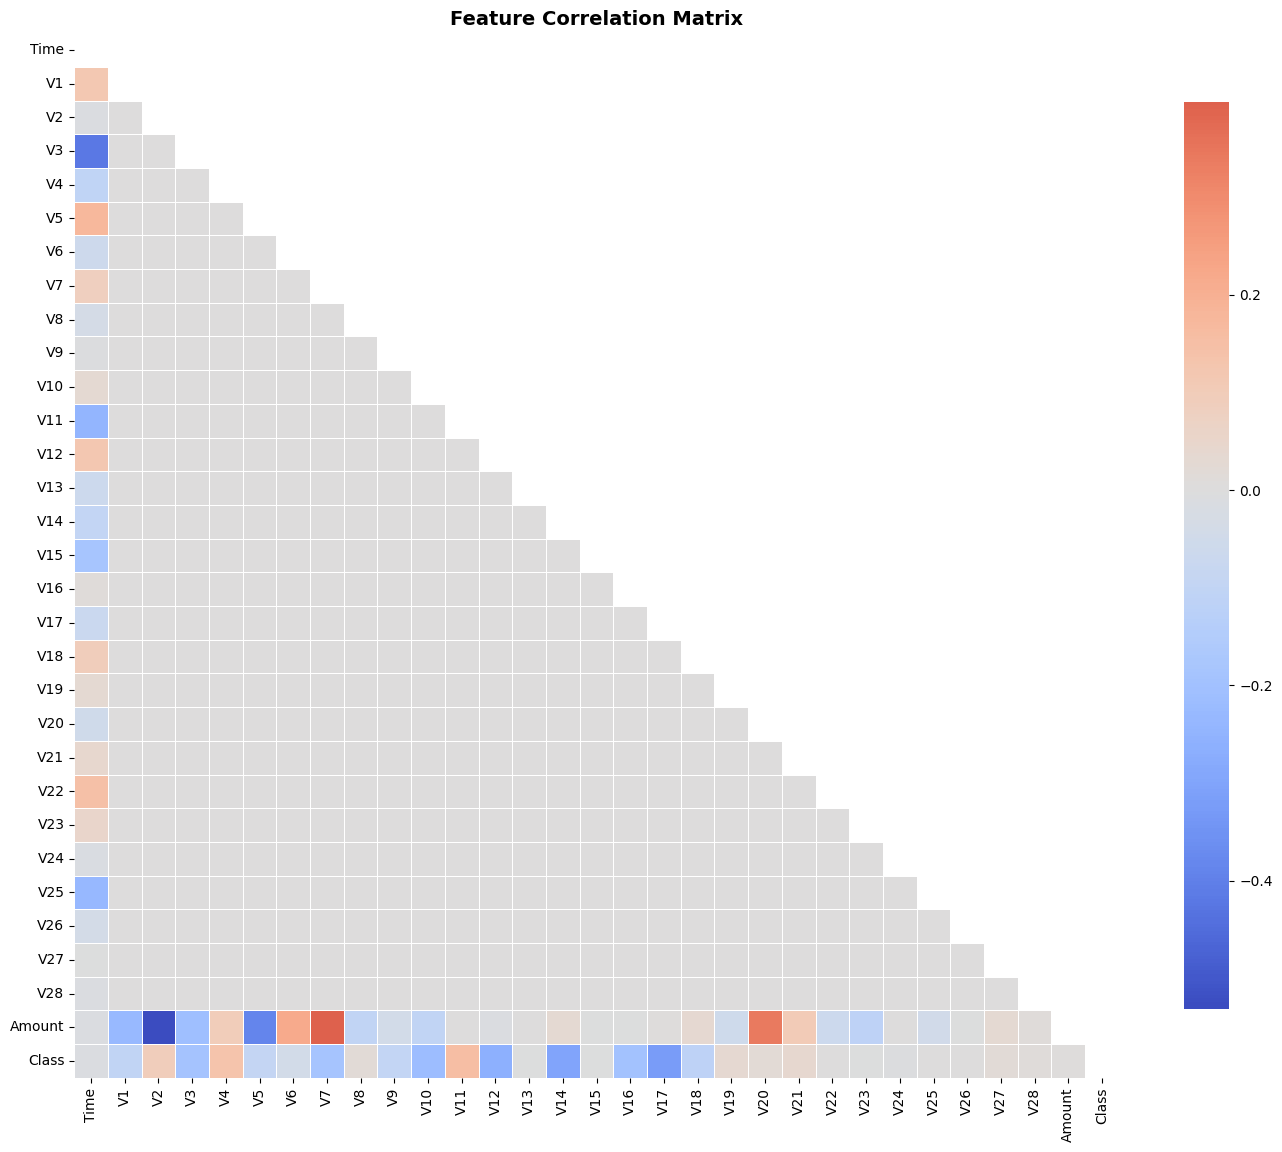

✓ Correlation matrix saved: outputs/primary/eda/correlation_matrix.png

EDA SUMMARY - PRIMARY DATASET (Credit Card Fraud)

Dataset: Credit Card Fraud Detection
Source: Kaggle (European cardholders, Sept 2013)

Key Statistics:
- Total transactions: 284,807
- Fraud cases: 492 (0.173%)
- Non-fraud cases: 284,315 (99.827%)
- Features: 30 (V1-V28 PCA + Time + Amount)
- Missing values: None

Top Predictive Features (by correlation):
V17    0.326481
V14    0.302544
V12    0.260593
V10    0.216883
V16    0.196539

Amount Statistics:
- Non-Fraud Mean: $88.29
- Fraud Mean: $122.21

Observations:
1. Extreme class imbalance (0.17% fraud)
2. PCA features have varying correlations with fraud
3. No missing values - clean dataset
4. Time and Amount are original features



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# ===== 1. LOAD DATA =====
print("Loading Credit Card Fraud Dataset...")
df = pd.read_csv('../data/primary/creditcard.csv')

print(f"Dataset shape: {df.shape}")
print(f"Total transactions: {len(df):,}")
print(f"Fraud cases: {df['Class'].sum():,}")
print(f"Fraud rate: {df['Class'].mean()*100:.3f}%")

# ===== 2. BASIC INFO =====
print("\n" + "="*60)
print("DATASET INFO")
print("="*60)
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nData types:\n{df.dtypes}")
print(f"\nMissing values: {df.isnull().sum().sum()}")

# ===== 3. STATISTICAL SUMMARY =====
print("\n" + "="*60)
print("STATISTICAL SUMMARY")
print("="*60)
print("\nNon-PCA Features:")
print(df[['Time', 'Amount', 'Class']].describe())

# ===== 4. CLASS DISTRIBUTION =====
print("\n" + "="*60)
print("CLASS DISTRIBUTION")
print("="*60)
fraud_counts = df['Class'].value_counts()
print(f"Non-Fraud (0): {fraud_counts[0]:,} ({fraud_counts[0]/len(df)*100:.2f}%)")
print(f"Fraud (1):     {fraud_counts[1]:,} ({fraud_counts[1]/len(df)*100:.3f}%)")

# ===== 5. CORRELATION WITH TARGET =====
print("\n" + "="*60)
print("FEATURE CORRELATION WITH FRAUD (Top 10)")
print("="*60)
correlations = df.corr()['Class'].drop('Class').abs().sort_values(ascending=False)
print(correlations.head(10))

# ===== 6. VISUALIZATIONS =====
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot 1: Class Distribution (Pie)
axes[0, 0].pie(fraud_counts, labels=['Non-Fraud', 'Fraud'], autopct='%1.3f%%',
               colors=['#2ecc71', '#e74c3c'], startangle=90, explode=[0, 0.1])
axes[0, 0].set_title('Class Distribution (Extreme Imbalance)', fontsize=12, fontweight='bold')

# Plot 2: Class Distribution (Bar with log scale)
axes[0, 1].bar(['Non-Fraud', 'Fraud'], fraud_counts.values, color=['#2ecc71', '#e74c3c'])
axes[0, 1].set_ylabel('Count (log scale)')
axes[0, 1].set_yscale('log')
axes[0, 1].set_title('Transaction Counts', fontsize=12, fontweight='bold')
for i, v in enumerate(fraud_counts.values):
    axes[0, 1].text(i, v, f'{v:,}', ha='center', va='bottom')

# Plot 3: Amount Distribution by Class
fraud_amounts = df[df['Class']==1]['Amount']
normal_amounts = df[df['Class']==0]['Amount']
axes[0, 2].hist(normal_amounts.clip(upper=normal_amounts.quantile(0.99)), bins=50, alpha=0.7, label='Non-Fraud', color='#2ecc71')
axes[0, 2].hist(fraud_amounts.clip(upper=fraud_amounts.quantile(0.99)), bins=50, alpha=0.7, label='Fraud', color='#e74c3c')
axes[0, 2].set_xlabel('Amount')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].set_title('Transaction Amount Distribution', fontsize=12, fontweight='bold')
axes[0, 2].legend()

# Plot 4: Time Distribution
axes[1, 0].hist(df[df['Class']==0]['Time'], bins=50, alpha=0.7, label='Non-Fraud', color='#2ecc71')
axes[1, 0].hist(df[df['Class']==1]['Time'], bins=50, alpha=0.7, label='Fraud', color='#e74c3c')
axes[1, 0].set_xlabel('Time (seconds)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Transaction Time Distribution', fontsize=12, fontweight='bold')
axes[1, 0].legend()

# Plot 5: Top Correlated Features
top_corr = correlations.head(10)
axes[1, 1].barh(top_corr.index, top_corr.values, color='steelblue')
axes[1, 1].set_xlabel('Absolute Correlation with Fraud')
axes[1, 1].set_title('Top 10 Correlated Features', fontsize=12, fontweight='bold')
axes[1, 1].invert_yaxis()

# Plot 6: Amount Statistics by Class
amount_stats = df.groupby('Class')['Amount'].agg(['mean', 'median', 'std'])
x = np.arange(3)
width = 0.35
axes[1, 2].bar(x - width/2, amount_stats.loc[0], width, label='Non-Fraud', color='#2ecc71')
axes[1, 2].bar(x + width/2, amount_stats.loc[1], width, label='Fraud', color='#e74c3c')
axes[1, 2].set_xticks(x)
axes[1, 2].set_xticklabels(['Mean', 'Median', 'Std'])
axes[1, 2].set_ylabel('Amount ($)')
axes[1, 2].set_title('Amount Statistics by Class', fontsize=12, fontweight='bold')
axes[1, 2].legend()

plt.tight_layout()
plt.savefig('../outputs/primary/eda/eda_overview.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ EDA visualization saved: outputs/primary/eda/eda_overview.png")

# ===== 7. CORRELATION HEATMAP (PCA Features) =====
plt.figure(figsize=(14, 12))
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
            xticklabels=True, yticklabels=True)
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../outputs/primary/eda/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Correlation matrix saved: outputs/primary/eda/correlation_matrix.png")

# ===== 8. SUMMARY =====
print("\n" + "="*60)
print("EDA SUMMARY - PRIMARY DATASET (Credit Card Fraud)")
print("="*60)
print(f"""
Dataset: Credit Card Fraud Detection
Source: Kaggle (European cardholders, Sept 2013)

Key Statistics:
- Total transactions: {len(df):,}
- Fraud cases: {df['Class'].sum():,} ({df['Class'].mean()*100:.3f}%)
- Non-fraud cases: {(df['Class']==0).sum():,} ({(1-df['Class'].mean())*100:.3f}%)
- Features: 30 (V1-V28 PCA + Time + Amount)
- Missing values: None

Top Predictive Features (by correlation):
{correlations.head(5).to_string()}

Amount Statistics:
- Non-Fraud Mean: ${df[df['Class']==0]['Amount'].mean():.2f}
- Fraud Mean: ${df[df['Class']==1]['Amount'].mean():.2f}

Observations:
1. Extreme class imbalance (0.17% fraud)
2. PCA features have varying correlations with fraud
3. No missing values - clean dataset
4. Time and Amount are original features
""")